In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import numpy as np
import matplotlib.pyplot as plt

/home/ty/.local/lib/python3.9/site-packages/pandas/compat/_optional.py:161: UserWarning: Pandas requires version '1.3.1' or newer of 'bottleneck' (version '1.2.1' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
def harmonic_oscillator(p0,q0,t):
    """Finite difference solver for harmonic oscillator"""

    n = len(t)

    p = np.zeros(n)
    q = np.zeros(n)
    p[0],q[0] = p0,q0

    for i in range(1,n):
        h = (t[i]-t[i-1])
        p[i] = p[i-1] - h*q[i-1]
        q[i] = q[i-1] + h*p[i-1]

    return p,q

class Net(nn.Module):
    def __init__(self, n_hidden=100):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3,n_hidden)
        self.fc2 = nn.Linear(n_hidden,n_hidden)
        self.fc3 = nn.Linear(n_hidden,n_hidden)
        self.fc4 = nn.Linear(n_hidden,2)

    def forward(self, state, t):
        x = torch.hstack((state,t))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x  #(p,q)

In [99]:
SemiGroupHQ = []
NoSemiGroupHQ = []
for i in [1,'T',.9,.8,.7,.6,.5,.4,.3,.2,.1]:
    if i == 1:
        SemiGroupHQ.append(torch.load('semigroup_HO.pt', map_location=torch.device('cpu'))) #Without semigroup loss
    else:
        SemiGroupHQ.append(torch.load('semigroup_HO' + str(i).replace('.','') + '.pt', map_location=torch.device('cpu'))) #Without semigroup loss
        
    if i == 1:
        NoSemiGroupHQ.append(torch.load('no_semigroup_HO.pt', map_location=torch.device('cpu'))) #Without semigroup loss
    else:
        NoSemiGroupHQ.append(torch.load('no_semigroup_HO' + str(i).replace('.','') + '.pt', map_location=torch.device('cpu'))) #Without semigroup loss
    

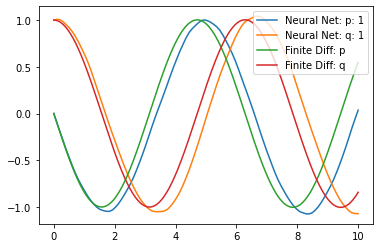

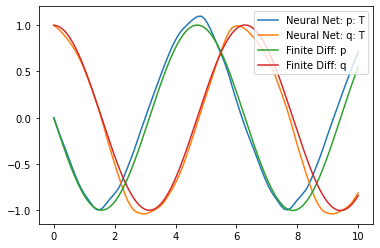

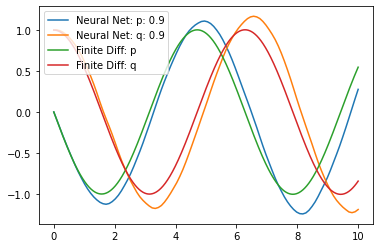

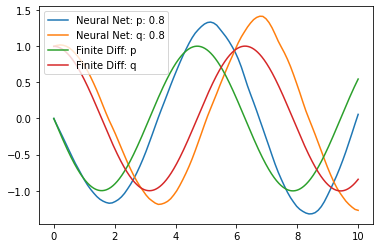

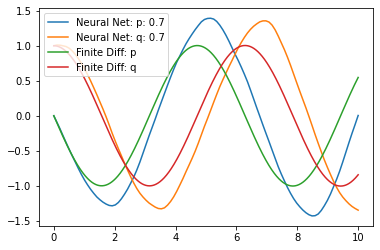

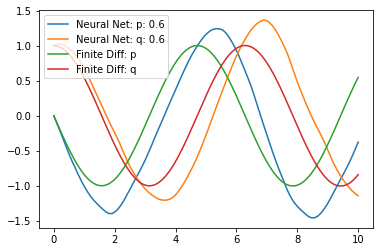

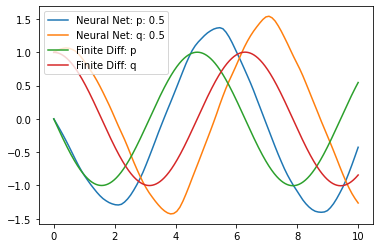

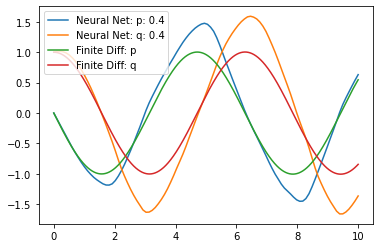

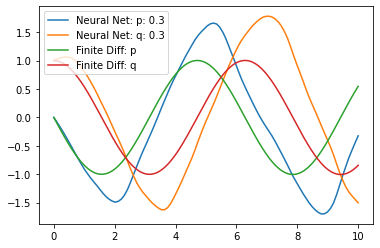

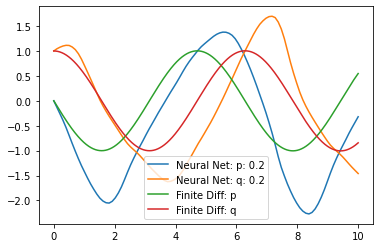

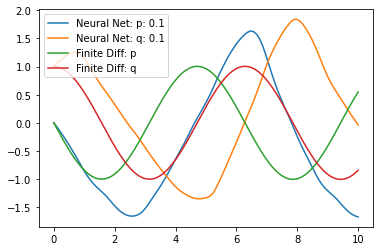

In [100]:
LearningRate = [1,'T',.9,.8,.7,.6,.5,.4,.3,.2,.1]
#Initial conditions
p0,q0 = 0,1
for j in range(len(SemiGroupHQ)):
    SemiGroupHQ[j].eval()
    plt.figure()
    with torch.no_grad(): #Tell torch to stop keeping track of gradients
        t = torch.linspace(0, 10, 100, dtype=torch.float)
        dt = torch.reshape(t[1]-t[0],(1,1))
        S = torch.tensor([[p0,q0]])
        p = torch.zeros(len(t))
        q = torch.zeros(len(t))
        p[0],q[0] = p0,q0
        for i in range(1,len(t)):
            S = SemiGroupHQ[j](S,dt)
            p[i] = S[0,0]
            q[i] = S[0,1]

        plt.plot(t, p, label="Neural Net: p: " + str(LearningRate[j]))
        plt.plot(t, q, label="Neural Net: q: " + str(LearningRate[j]))
        # plt.legend()
        # plt.show()

    #Finite difference
    # plt.figure()
    t = torch.linspace(0, 10, 10000, dtype=torch.float)
    p,q = harmonic_oscillator(p0,q0,t)
    plt.plot(t, p, label="Finite Diff: p")
    plt.plot(t, q, label="Finite Diff: q")
    plt.legend()
    plt.show()

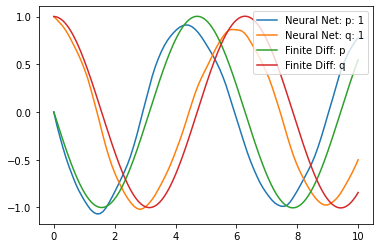

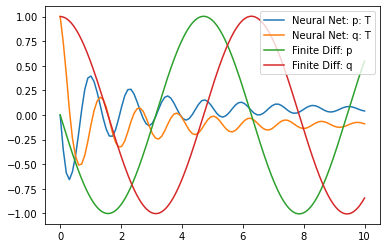

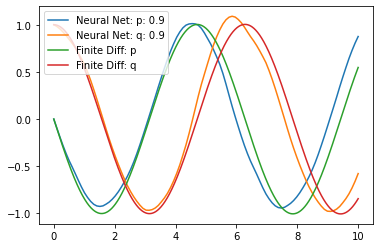

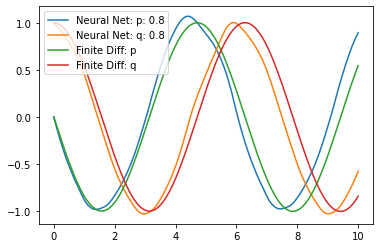

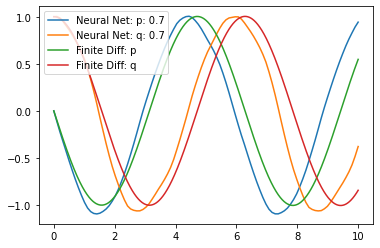

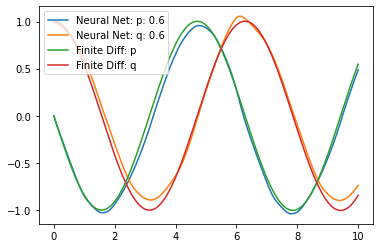

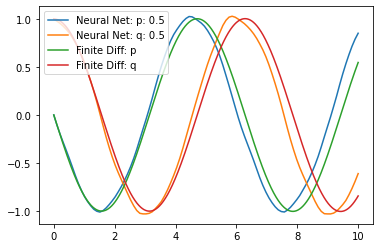

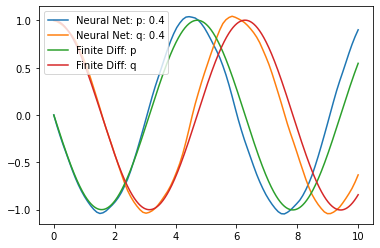

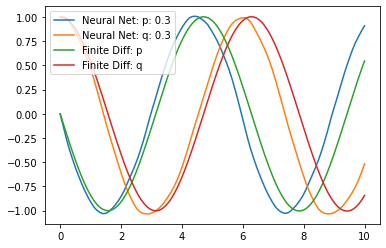

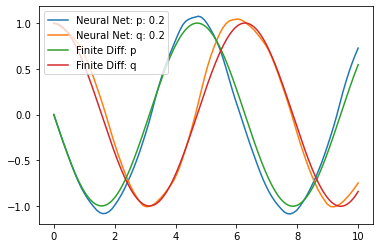

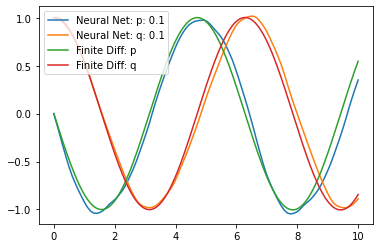

In [39]:
LearningRate = [1,'T',.9,.8,.7,.6,.5,.4,.3,.2,.1]
#Initial conditions
p0,q0 = 0,1
for j in range(len(NoSemiGroupHQ)):
    SemiGroupHQ[j].eval()
    plt.figure()
    with torch.no_grad(): #Tell torch to stop keeping track of gradients
        t = torch.linspace(0, 10, 100, dtype=torch.float)
        dt = torch.reshape(t[1]-t[0],(1,1))
        S = torch.tensor([[p0,q0]])
        p = torch.zeros(len(t))
        q = torch.zeros(len(t))
        p[0],q[0] = p0,q0
        for i in range(1,len(t)):
            S = NoSemiGroupHQ[j](S,dt)
            p[i] = S[0,0]
            q[i] = S[0,1]

        plt.plot(t, p, label="Neural Net: p: " + str(LearningRate[j]))
        plt.plot(t, q, label="Neural Net: q: " + str(LearningRate[j]))
        # plt.legend()
        # plt.show()

    #Finite difference
    # plt.figure()
    t = torch.linspace(0, 10, 10000, dtype=torch.float)
    p,q = harmonic_oscillator(p0,q0,t)
    plt.plot(t, p, label="Finite Diff: p")
    plt.plot(t, q, label="Finite Diff: q")
    plt.legend()
    plt.show()

In [41]:
S1 = torch.tensor([[p0,q0]])
p1 = torch.zeros(len(t))
q1 = torch.zeros(len(t))
S2 = torch.tensor([[p0,q0]])
p2 = torch.zeros(len(t))
q2 = torch.zeros(len(t))
for i in range(1,len(t)):
    S1 = NoSemiGroupHQ[0](S,dt)
    p1[i] = S1[0,0]
    q1[i] = S1[0,1]
    S2 = SemiGroupHQ[0](S,dt)
    p2[i] = S2[0,0]
    q2[i] = S2[0,1]

In [42]:
torch.mean(p1-p2),torch.mean(q1-q2)

(tensor(0.0261, grad_fn=<MeanBackward0>),
 tensor(0.0113, grad_fn=<MeanBackward0>))

In [18]:
SemiGroupHQ=[]
SemiGroupHQ.append(torch.load('semigroup_HO.pt', map_location=torch.device('cpu')))

In [22]:
model = torch.load('semigroup_HO.pt', map_location=torch.device('cpu'))

In [43]:
S

tensor([[ 0.3509, -0.8892]])

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import numpy as np
import matplotlib.pyplot as plt

def harmonic_oscillator(p0,q0,t):
    """Finite difference solver for harmonic oscillator"""

    n = len(t)

    p = np.zeros(n)
    q = np.zeros(n)
    p[0],q[0] = p0,q0

    for i in range(1,n):
        h = (t[i]-t[i-1])
        p[i] = p[i-1] - h*q[i-1]
        q[i] = q[i-1] + h*p[i-1]

    return p,q

class Net(nn.Module):
    def __init__(self, n_hidden=100):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3,n_hidden)
        self.fc2 = nn.Linear(n_hidden,n_hidden)
        self.fc3 = nn.Linear(n_hidden,n_hidden)
        self.fc4 = nn.Linear(n_hidden,2)

    def forward(self, state, t):
        x = torch.hstack((state,t))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x  #(p,q)

if torch.cuda.is_available() == True:
    device = torch.device('cuda')
else: 
    device = torch.device('cpu')
model = Net(100).to(device)

#Set up optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)  #Learning rate
scheduler = StepLR(optimizer, step_size=1, gamma=1)

#Batch size
batch_size = 1000
epochs = int(1e5)

#Step size
t = torch.linspace(0, 1, batch_size+1, dtype=torch.float)[:,None]
h = t[1]-t[0]
t = t[:-1] + h/2
t = t.to(device)

#Ones
ones = torch.ones((batch_size,1), dtype=torch.float).to(device)

model.train()

Net(
  (fc1): Linear(in_features=3, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=2, bias=True)
)

In [45]:
x = (2*torch.rand(2, dtype=torch.float)-1).to(device)

#Random final time
T = torch.rand(1, dtype=torch.float).to(device)

#Weak formulation loss
optimizer.zero_grad()
S = model(ones*x,t*T)

In [71]:
# S[0,0] = 0
# S[-1,0] = 0
# S[1,0]=1
# S[2,0]=2
# S[-2,0]=1
# S[-3,0]=2
# S

In [70]:
# S[1:-1:2,0]

In [54]:
len(S)

1000

In [85]:
SemiGroupDepth = []
NoSemiGroupDepth = []
# NoSemiGroupHQ = []
for i in ['Trap','Simp']:
    SemiGroupDepth.append(torch.load('semigroup_'+i+'.pt', map_location=torch.device('cpu'))) #semigroup loss
    NoSemiGroupDepth.append(torch.load('no_semigroup_'+i+'.pt', map_location=torch.device('cpu'))) #Without semigroup loss

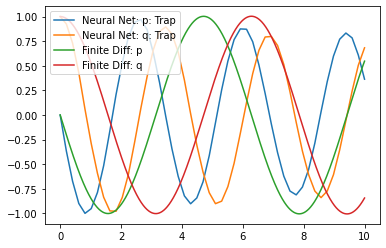

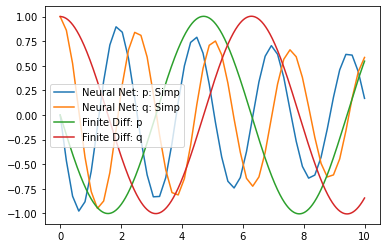

In [84]:
Depth = ['Trap','Simp']
#Initial conditions
p0,q0 = 0,1
for j in range(len(SemiGroupDepth)):
    SemiGroupDepth[j].eval()
    plt.figure()
    with torch.no_grad(): #Tell torch to stop keeping track of gradients
        t = torch.linspace(0, 10, 50, dtype=torch.float)
        dt = torch.reshape(t[1]-t[0],(1,1))
        S = torch.tensor([[p0,q0]])
        p = torch.zeros(len(t))
        q = torch.zeros(len(t))
        p[0],q[0] = p0,q0
        for i in range(1,len(t)):
            S = SemiGroupDepth[j](S,dt)
            p[i] = S[0,0]
            q[i] = S[0,1]

        plt.plot(t, p, label="Neural Net: p: " + Depth[j])
        plt.plot(t, q, label="Neural Net: q: " + Depth[j])
        # plt.legend()
        # plt.show()

    #Finite difference
    # plt.figure()
    t = torch.linspace(0, 10, 10000, dtype=torch.float)
    p,q = harmonic_oscillator(p0,q0,t)
    plt.plot(t, p, label="Finite Diff: p")
    plt.plot(t, q, label="Finite Diff: q")
    plt.legend()
    plt.show()

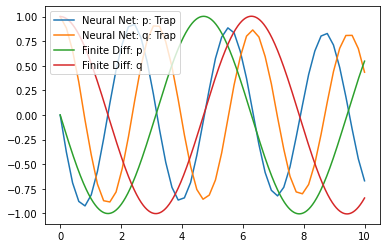

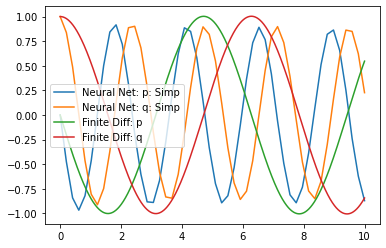

In [86]:
Depth = ['Trap','Simp']
#Initial conditions
p0,q0 = 0,1
for j in range(len(NoSemiGroupDepth)):
    NoSemiGroupDepth[j].eval()
    plt.figure()
    with torch.no_grad(): #Tell torch to stop keeping track of gradients
        t = torch.linspace(0, 10, 50, dtype=torch.float)
        dt = torch.reshape(t[1]-t[0],(1,1))
        S = torch.tensor([[p0,q0]])
        p = torch.zeros(len(t))
        q = torch.zeros(len(t))
        p[0],q[0] = p0,q0
        for i in range(1,len(t)):
            S = NoSemiGroupDepth[j](S,dt)
            p[i] = S[0,0]
            q[i] = S[0,1]

        plt.plot(t, p, label="Neural Net: p: " + Depth[j])
        plt.plot(t, q, label="Neural Net: q: " + Depth[j])
        # plt.legend()
        # plt.show()

    #Finite difference
    # plt.figure()
    t = torch.linspace(0, 10, 10000, dtype=torch.float)
    p,q = harmonic_oscillator(p0,q0,t)
    plt.plot(t, p, label="Finite Diff: p")
    plt.plot(t, q, label="Finite Diff: q")
    plt.legend()
    plt.show()

In [97]:
SemiGroup2D = []
SemiGroup2D.append(torch.load('semigroup_2D.pt', map_location=torch.device('cpu'))) #semigroup loss

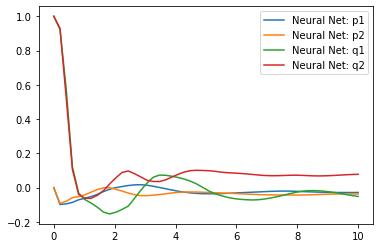

In [101]:
Depth = ['Trap','Simp']
#Initial conditions
p10,p20,q10,q20 = 0,0,1,1
for j in range(len(SemiGroup2D)):
    SemiGroup2D[j].eval()
    plt.figure()
    with torch.no_grad(): #Tell torch to stop keeping track of gradients
        t = torch.linspace(0, 10, 50, dtype=torch.float)
        dt = torch.reshape(t[1]-t[0],(1,1))
        S = torch.tensor([[p10,p20,q10,q20]])
        p1 = torch.zeros(len(t))
        p2 = torch.zeros(len(t))
        q1 = torch.zeros(len(t))
        q2 = torch.zeros(len(t))
        p1[0],p2[0],q1[0],q2[0] = p10,p20,q10,q20
        for i in range(1,len(t)):
            S = SemiGroup2D[j](S,dt)
            p1[i] = S[0,0]
            p2[i] = S[0,1]
            q1[i] = S[0,2]
            q2[i] = S[0,3]

        plt.plot(t, p1, label="Neural Net: p1")
        plt.plot(t, p2, label="Neural Net: p2")
        plt.plot(t, q1, label="Neural Net: q1")
        plt.plot(t, q2, label="Neural Net: q2")
        plt.legend()
        # plt.show()

In [94]:
p1

tensor([ 0.0000, -0.0469, -0.0476,  ...,  0.4501,  0.4501,  0.4501],
       grad_fn=<CopySlices>)

In [91]:
SemiGroup2D

[Net(
   (fc1): Linear(in_features=5, out_features=100, bias=True)
   (fc2): Linear(in_features=100, out_features=100, bias=True)
   (fc3): Linear(in_features=100, out_features=100, bias=True)
   (fc4): Linear(in_features=100, out_features=4, bias=True)
 )]

In [95]:
SemiGroup2D[j](S,dt)

tensor([[-0.0088, -0.0414,  0.0731, -0.1005]], grad_fn=<AddmmBackward0>)